In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In [4]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from ucimlrepo import fetch_ucirepo,list_available_datasets

# List of Available UCI repositories

list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [7]:
# Fetching the required dataset from list of UCI repo

adultdataset = fetch_ucirepo(id=2)

In [8]:
# Creating dataframe with feature columns and target columns

x=pd.DataFrame(adultdataset.data.features)

y=pd.DataFrame(adultdataset.data.targets,columns=['income'])

df=pd.concat([x,y],axis=1)   # To merge this 2 datasets

df.to_excel("adultdata.xlsx",index=False)   # To save this dataframe to excel into local machine

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(48842, 15)

In [6]:
df.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Problem Statements

In [8]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [15]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [16]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

# Data cleaning and Feature Engineering
## Quality  - Data cleaning
1. workclass column has non-workclass value which is '?'
2. occupations column has non-occupation value
3. native-country column needs data cleaning and has '?' 
## Feature Engg:
1. grouping the entities., in the column like., school - 1st-12th grade etc
2. grouping in marital status column, relationship, occupation


# Exploring data analysis
1. Univariate 
2. Bivariate
3. Multivariate

In [12]:
# Backup 

backup = df.copy()

In [11]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## problem columns 
### 27	54	?	180211	Some-college	10	Married-civ-spouse	?	Husband	Asian-Pac-Islander	Male	0	0	60	South	>50K

In [20]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [13]:
# Filling the values with Mode value which is Private( highest) for workclass

# stripping 

#adult['workclass'] = adult['workclass'].str.strip()

# Replace 

df['workclass'] = df['workclass'].replace('?','Private')



In [14]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [15]:
#adult['occupation'] = adult['occupation'].str.strip()

df['occupation'] = df['occupation'].replace('?','Prof-specialty')   # Most highest value replaced with '?'

In [16]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [17]:
#adult['native-country'] = adult['native-country'].str.strip()

df['native-country'] = df['native-country'].replace('?','United-States')

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Feature engineering - Data Preprocessing - Categorical grouping

In [19]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [38]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
df['education'] = df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'],'School')

df['education'] = df['education'].replace(['Assoc-acdm','Assoc-voc','Some-college','Prof-school'],'Associate degree')

df['education'] = df['education'].replace('Prof-school','Masters')

df['education'].unique()

array(['Bachelors', 'School', 'Masters', 'Associate degree', 'Doctorate'],
      dtype=object)

In [21]:
df['education'].value_counts()

education
School              22192
Associate degree    15374
Bachelors            8025
Masters              2657
Doctorate             594
Name: count, dtype: int64

In [26]:
df['marital-status'].value_counts()

marital-status
Married          23044
Never-married    16117
Other             9681
Name: count, dtype: int64

In [34]:
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')

df['marital-status'] = df['marital-status'].replace('Other','D-S-W')

df['marital-status'] = df['marital-status'].replace('Never-married','Unmarried')

df['marital-status'].unique()

array(['Unmarried', 'Married', 'D-S-W'], dtype=object)

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,School,9,D-S-W,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,School,9,D-S-W,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [40]:
#df['relationship'] = df['relationship'].replace(['Wife','Husband'],'Spouse')

df['relationship'] = df['relationship'].replace('Own-child','Child')

df['relationship'] = df['relationship'].replace('Not-in-family','Non-family member')
    
df['relationship'].unique()

array(['Non-family member', 'Husband', 'Wife', 'Child', 'Unmarried',
       'Other-relative'], dtype=object)

In [41]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [48]:
df['income'] = df['income'].replace('<=50K.','<=50K')

df['income'] = df['income'].replace('>50K.','>50K')

df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
26215,28,Private,190525,Masters,14,Unmarried,Prof-specialty,Child,White,Male,0,0,40,United-States,<=50K
15433,31,Private,25216,Bachelors,13,D-S-W,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
38712,32,Self-emp-not-inc,321313,School,9,Unmarried,Craft-repair,Child,Black,Male,0,0,40,United-States,<=50K
20795,47,State-gov,199512,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
41972,30,Private,118941,Associate degree,10,Unmarried,Exec-managerial,Non-family member,White,Female,0,0,40,United-States,<=50K


# Combining Capital(loss&gain) columns to get the Net capital¶

In [49]:
df['net_capital'] = df['capital-gain']-df['capital-loss']

df.sample(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,net_capital
48754,34,Private,31341,School,9,D-S-W,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
25611,49,Self-emp-inc,229737,Associate degree,15,Married,Prof-specialty,Husband,White,Male,99999,0,37,United-States,>50K,99999
40497,36,Private,181705,Associate degree,10,D-S-W,Transport-moving,Non-family member,White,Male,0,0,40,United-States,<=50K,0
20307,47,Self-emp-not-inc,26145,Associate degree,11,Married,Sales,Husband,White,Male,0,0,40,United-States,>50K,0


# Data statistical description

In [50]:
df.shape

(48842, 16)

In [51]:
unique_count = df.nunique()
unique_count

age                  74
workclass             8
fnlwgt            28523
education             5
education-num        16
marital-status        3
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
net_capital         221
dtype: int64

In [53]:
df.describe().T  # numerical data

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0
net_capital,48842.0,991.565313,7475.549906,-4356.0,0.0,0.0,0.0,99999.0


# Data categorical description¶

In [54]:
df.describe(include=['object']).T   # to show comprehensive overview of string data

,count,unique,top,freq
workclass,47879,8,Private,35742
education,48842,5,School,22192
marital-status,48842,3,Married,23044
occupation,47876,14,Prof-specialty,8015
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48568,41,United-States,44415
income,48842,2,<=50K,37155


# Exploring data using Univariate

### In case of numeric varibles:
##### * Mean, Median and mode (for central tendency)
##### * Standard deviation and variance (for spread)
##### * Histogram, box plots and density plots (for visalization of distribution")

### In case of categorical variables:
##### * Frequency tables 
##### * Bar plots or pie charts (for visualization of category distribution)

<Axes: xlabel='income', ylabel='Density'>

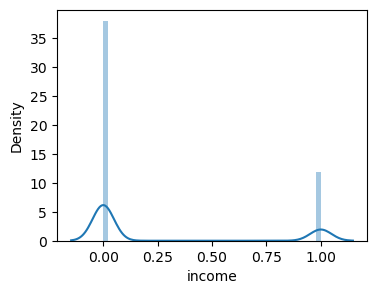

In [86]:
# converting string to numeric
income_numeric = df['income'].replace({'<=50K':0, '>50K':1})
#df['income'].unique()

#df_income_numeric.unique()

# plotting 
plt.figure(figsize=(4,3))

sns.distplot(income_numeric)

## To find the skewness of income numerical variable

In [87]:
income_numeric.skew()

1.2222161678605545

#### Notes:
##### *Skewness means lack of symmetry in distribution of data, particularly in numerical data*. 
##### *Measure that describes about the shape of distribution in relation to normal distribution also called Gaussian distribution*
##### *Types of skewness : Positive(right), Negative(left), No skew(symmetrical) - data is evenly distributed on both sides* 
##### *Purpose : Improve model performance, handle otliers, make data  best suited for specific algorithms*                .
##### *Impact on ML model: To reduce skewness and make data normal, using log transformations to right skewed,* 
#####                     *data can compress the tail and make distribution closer to normal*.
##### *This density for income=0 is significantly higher than income=1* 
##### *Skewness of income distribution is 1.222, which indicates positive skewness(right skewed)  Slightly tailed towards right*

In [67]:
backup = df

In [62]:
original_skew = income_numeric.skew()

print("original_skew :", original_skew)

original_skew : 1.2222161678605545


# Exploring Data using Bivariate analysis¶
#### Used to explore the relationship between 2 variables 

## 1. Continuous vs Categorical

<Axes: xlabel='age', ylabel='income'>

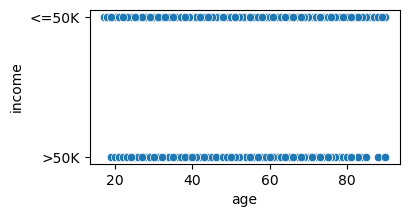

In [94]:
plt.figure(figsize=(4,2))

sns.scatterplot(x='age',y='income',data=df)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['age']]  # Independent variable (age)
y = df['income']  # Dependent variable (income)

y = y.map({'<=50K': 0, '>50K': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model training 
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # to predict on test model

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7456493550808708


## Filtering age_group data¶

In [95]:
bins = [0,20,30,40,50,60,70,80,90]

labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df['age_group'].value_counts()

age_group
30-40    12838
20-30    12170
40-50    10403
50-60     6202
<20       3623
60-70     2738
70-80      720
80+        148
Name: count, dtype: int64

In [96]:
df['age_group'].unique()

['30-40', '40-50', '50-60', '20-30', '<20', '70-80', '60-70', '80+']
Categories (8, object): ['<20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80+']

## Code snippet to filter the age groups(label based selection .loc)

In [122]:
df_30_40 = df.loc[df['age_group'] == '30-40']

df_20_30 = df.loc[df['age_group']=='20-30']

df_40_50 = df.loc[df['age_group']=='40-50']

df_50_60 = df.loc[df['age_group']=='50-60']

df_lessthan_20 = df.loc[df['age_group']=='<20']

df_60_70 = df.loc[df['age_group']=='60-70']

df_70_80 = df.loc[df['age_group']=='70-80']

df_80_above = df.loc[df['age_group']=='80+']

## 2. Continuous Vs Categorical 

Descriptive statistics count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net_capital, dtype: float64


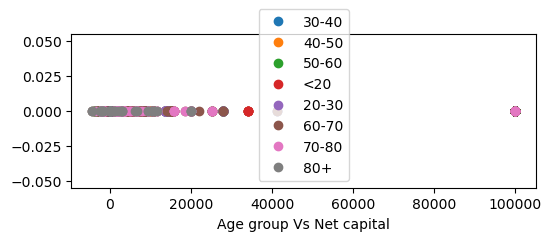

In [121]:
plt.figure(figsize=(6, 2))

# to plot bivariable for age_group vs income  (Numerical-Numerical)

plt.plot(df_30_40['net_capital'], np.zeros_like(df_30_40['net_capital']), 'o', label="30-40")
plt.plot(df_40_50['net_capital'], np.zeros_like(df_40_50['net_capital']), 'o', label="40-50")
plt.plot(df_50_60['net_capital'], np.zeros_like(df_50_60['net_capital']), 'o', label="50-60")
plt.plot(df_lessthan_20['net_capital'], np.zeros_like(df_lessthan_20['net_capital']), 'o', label="<20")
plt.plot(df_20_30['net_capital'], np.zeros_like(df_20_30['net_capital']), 'o', label="20-30")
plt.plot(df_60_70['net_capital'], np.zeros_like(df_60_70['net_capital']), 'o', label="60-70")
plt.plot(df_70_80['net_capital'], np.zeros_like(df_70_80['net_capital']), 'o', label="70-80")
plt.plot(df_80_above['net_capital'], np.zeros_like(df_80_above['net_capital']), 'o', label="80+")

plt.xlabel('Age group Vs Net capital')
print('Descriptive statistics', df['net_capital'].describe())
plt.legend()
plt.show()

#### *This could indicate age_group above 70 years old people have accumulated more wealth compared to other age_groups* 

### Distribution of age_group kernal density estimation

Descriptive statistics count     48842
unique        8
top       30-40
freq      12838
Name: age_group, dtype: object


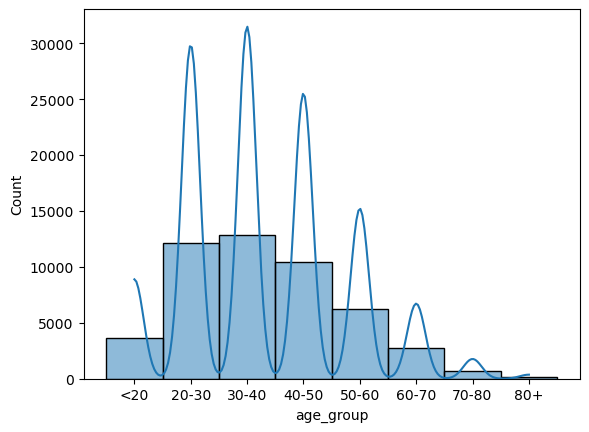

In [101]:
# Distribution of age_group kernal density estimation

sns.histplot(df["age_group"], kde=True)

print('Descriptive statistics', df['age_group'].describe())

# Correlation between variables
##### *Statistical measure that describes the strength and direction of linear relationship between numerical variables*.
##### *This pearson correlation works for numeric data. The correlation coefficient- is a measure of linear correlation between 2 sets of data. It takes values between -1 and +1. Denoted by r*

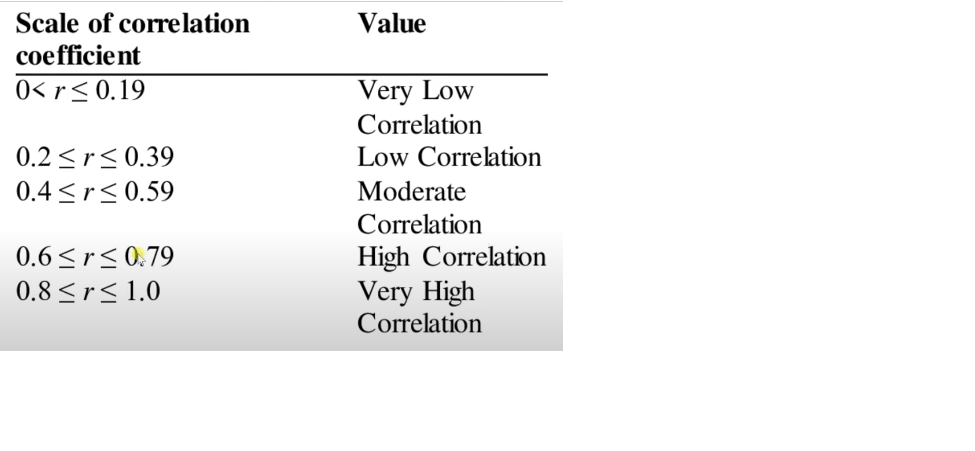

In [103]:
from IPython.display import Image, display

image_path = 'corr.png'

display(Image(filename=image_path))

In [105]:
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
net_capital          int64
age_group         category
dtype: object

In [106]:
numeric_df = df.select_dtypes(include=['int64'])

numeric_df

numeric_df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,net_capital
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.073916
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.003459
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.120387
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.998547
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,-0.085251
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.078962
net_capital,0.073916,-0.003459,0.120387,0.998547,-0.085251,0.078962,1.000000


 ### to check the correlation between these variables

In [108]:
netgain_corr = numeric_df['capital-gain'].corr(numeric_df['net_capital']) 

print("netgain_corr :", netgain_corr)

netgain_corr : 0.9985472540616448


# 3. Continuous Vs Continuous 

### Linear correlation capital gain Vs net capital

<Axes: xlabel='capital-gain', ylabel='net_capital'>

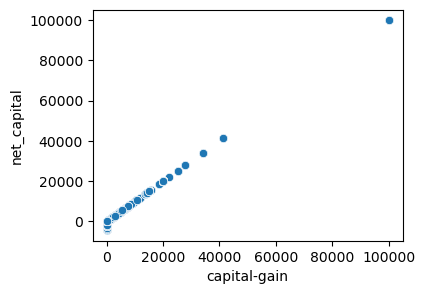

In [110]:
plt.figure(figsize=(4,3))

sns.scatterplot(x='capital-gain', y='net_capital', data=numeric_df)

#### Notes
##### This meant to be positive linear correlation where x and y variables increase together in consistent pattern.


## Correlation coefficient - Pearson's r 


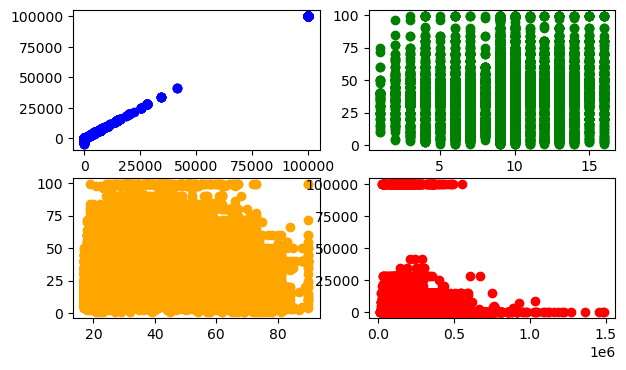

In [111]:
plt.figure(figsize=(7,4))

plt.subplot(2, 2, 1)
plt.scatter(df['capital-gain'], df['net_capital'], color='blue')    # strong positive linear correlation 

 

plt.subplot(2, 2, 2)
plt.scatter(df['education-num'], df['hours-per-week'], color='green') # very low


plt.subplot(2, 2, 3)
plt.scatter(df['age'], df['hours-per-week'], color='orange')  # Low 


plt.subplot(2, 2, 4)
plt.scatter(df['fnlwgt'], df['capital-gain'], color='red')  # Negative correlation

In [112]:
# net_capital vs capital gain
corr_value = numeric_df['capital-gain'].corr(numeric_df['net_capital'])

print(f"capital-gain Vs net_capital (Very high corr) = {corr_value:.2f}")

# education-num vs hours per week 
corr_value = numeric_df['education-num'].corr(numeric_df['hours-per-week'])

print(f"education-num Vs hours-per-week (Moderate corr) = {corr_value:.2f}")

# age vs hours per week
corr_value = numeric_df['age'].corr(numeric_df['hours-per-week'])

print(f"age Vs hours-per-week (Low corr) = {corr_value:.2f}")

# final weight vs capital-gain
corr_value = numeric_df['capital-gain'].corr(numeric_df['fnlwgt']) 

print(f"final weight Vs capital gain (No corr) = {corr_value:.2f}")

# Age vs net capital
corr_value = numeric_df['net_capital'].corr(numeric_df['age']) 

print(f"age vs net_capital = {corr_value:.2f}")

capital-gain Vs net_capital (Very high corr) = 1.00
education-num Vs hours-per-week (Moderate corr) = 0.14
age Vs hours-per-week (Low corr) = 0.07
final weight Vs capital gain (No corr) = -0.00
age vs net_capital = 0.07


# Finding the outliers

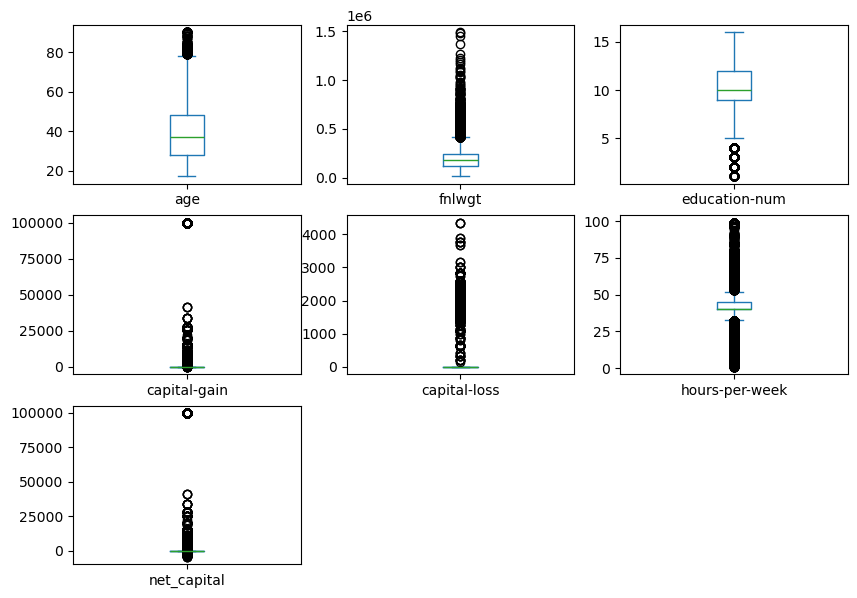

In [113]:
#df.hist(figsize=(10,7),layout=(3,3), sharex=False)
#plt.show()

df.plot(kind='box', figsize=(10,7), layout=(3,3), sharex=False, subplots= True)
plt.show()

<Axes: >

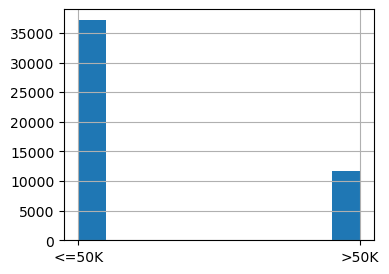

In [114]:
plt.figure(figsize=(4,3))
df['income'].hist()

# Finding correlation between age and net capital

<Axes: >

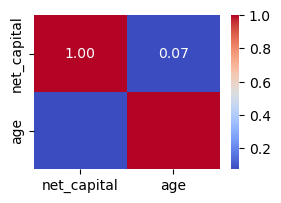

In [115]:
weak_corr = df[['net_capital','age']].corr()

plt.figure(figsize=(3,2))

sns.heatmap(weak_corr, annot=True, cmap='coolwarm', fmt='.2f')

# 4. Categorical to Categorical

<Axes: xlabel='sex', ylabel='count'>

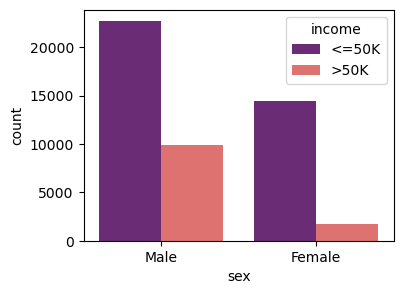

In [118]:
plt.figure(figsize=(4,3))

sns.countplot(x='sex', hue='income', data=df, palette='magma')

<Figure size 300x200 with 0 Axes>

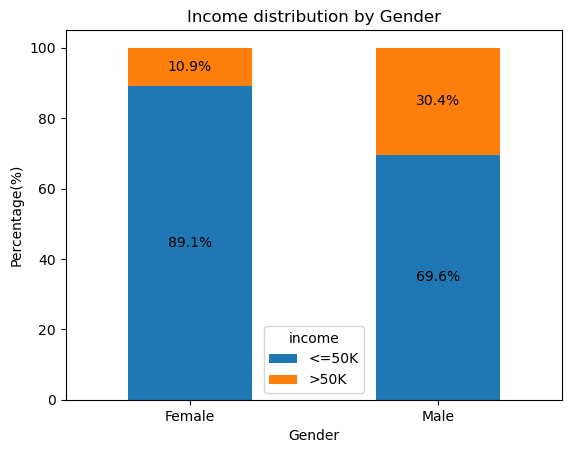

In [119]:
# to create stack bar chart: using cross tab
plt.figure(figsize=(3,2))

crosstab = pd.crosstab(df['sex'],df['income'], normalize = 'index')*100

ax = crosstab.plot(kind='bar', stacked=True)

plt.xticks(rotation= 0)


plt.title('Income distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage(%)')

# to show percentages in container
for container in ax.containers:
    ax.bar_label(container, fmt= '%1.1f%%', label_type= 'center')


# Multivariant Relations

<Axes: >

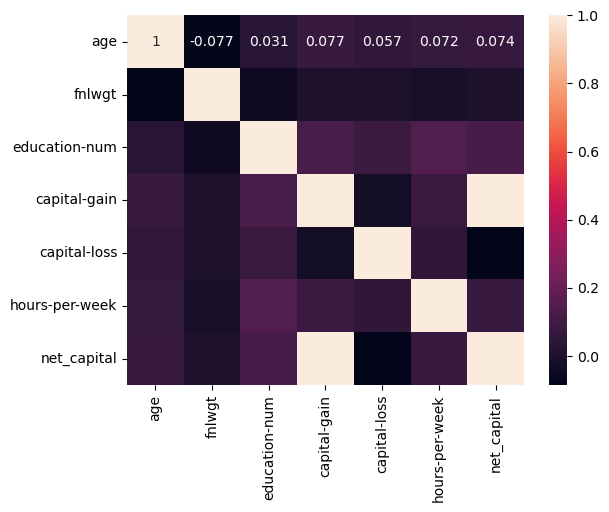

In [117]:
#plt.figure(figsize=(5, 3))

sns.heatmap(numeric_df.corr(), annot=True)